In [51]:
import copy
import numpy as np
import matplotlib.pyplot as p
import astropy.units as u
import funcs
import pickle
import CBSearch
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
cbs = CBSearch.CBSearch(lcfilepath='Lightcurves/K47_clean_noecl.txt')
#Load lightcurve

#lc = np.genfromtxt('Lightcurves/K34_clean_noecl.txt')
#time = lc[:,0]+2454833
#flux = lc[:,1]
#err = lc[:,2]

Adding Kepler Time offset of 2454833.


<IPython.core.display.Javascript object>


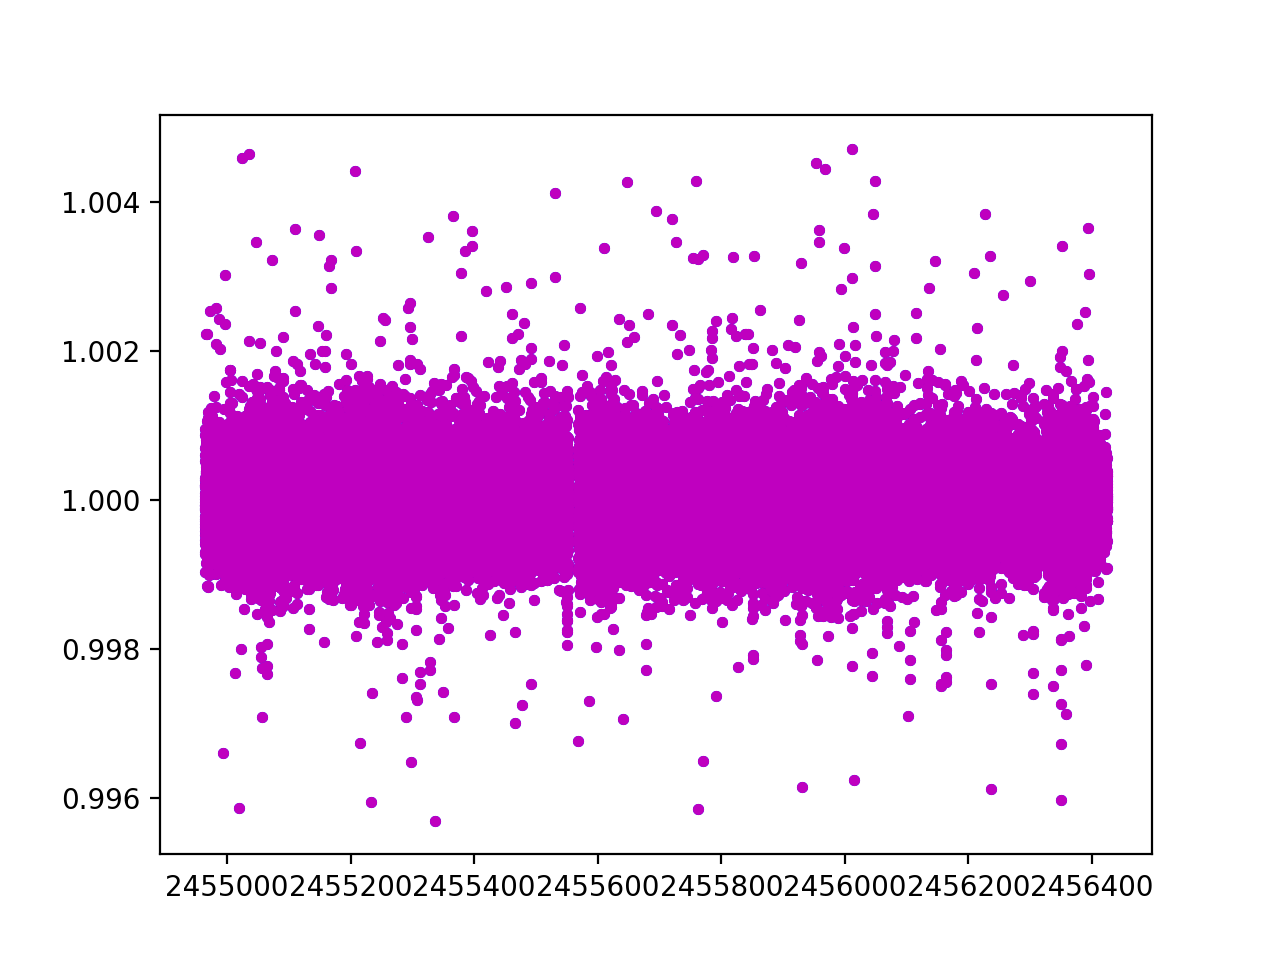

In [116]:
#try without K34b transits
#lc_notran = np.genfromtxt('Lightcurves/K34_cln_noecl_notran.txt')
#time_nt = lc_notran[:,0]
#flux_nt = lc_notran[:,1]
#err_nt = lc_notran[:,2]

p.figure()
p.plot(cbs.time,cbs.flux,'b.')
cbs.cut_outliers(thresh=15)
p.plot(cbs.time,cbs.flux,'m.')

#outlier cut
#cutidx = funcs.outlier_cut(time_nt,flux_nt,10, 250)
#time_nt_cut, flux_nt_cut = time_nt[cutidx],flux_nt[cutidx]
#time_nt_cut, flux_nt_cut = time_nt, flux_nt



In [115]:
# Kepler 47


cb = funcs.CBSystem(m1 = 1.043,f1 = 1.,m2 = 0.362,f2 = 0.00568,
                      r1 = 0.964 * u.Rsun.to('au'),r2 = 0.3506 * u.Rsun.to('au'),
                      ab = 0.0836, eb = 0.0234, ib = np.deg2rad(89.34),
                      wb = np.deg2rad(212.3), fb = np.deg2rad(-212.3+90),
                      mp = 0 * u.Mjup.to('Msun'), rp = 2.98 * u.Rearth.to('au'),
                      ap = 0.2956, ep = 0., ip = np.deg2rad(89.59),
                      wp = 0, fp = 2*np.pi*(31.367-29.306346)/49.514+np.pi/2, Wp = np.deg2rad(0.1),
                      t0 = -29.306346+2455000)

cb_planetc = funcs.CBSystem(m1 = 1.043,f1 = 1.,m2 = 0.362,f2 = 0.00568,
                      r1 = 0.964 * u.Rsun.to('au'),r2 = 0.3506 * u.Rsun.to('au'),
                      ab = 0.0836, eb = 0.0234, ib = np.deg2rad(89.34),
                      wb = np.deg2rad(212.3), fb = np.deg2rad(-212.3+90),
                      mp = 0 * u.Mjup.to('Msun'), rp = 2.98 * u.Rearth.to('au'),
                      ap = 0.989, ep = 0., ip = np.deg2rad(89.826),
                      wp = 0, fp = 2*np.pi*(31.367-29.306346)/49.514+np.pi/2, Wp = np.deg2rad(1.06),
                      t0 = 2455246.6545)
#rp and fp not updated to planet c.

ab0 = cb.ab
mb0 = cb.m1 + cb.m2
p_p0 = (cb.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days
p_planetc = (cb_planetc.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days

fp0 = cb.fp
print(1/np.sqrt( (cb.m1+cb.m2)/cb.ab**3 )*365.25)
print(p_p0)
print(1./p_planetc)

timing_precision = 30./86400./365.25 * (2*np.pi)  #in years/2pi

t = cbs.time


7.44837405485
49.523200878139015
0.003299540778581055


In [119]:
cbs.time[-1]-2455000

1424.0010795211419

In [111]:
# make the reference stacked light curve set

#tts = funcs.reb_cb_c(cb,tmin=np.min(t),tmax=np.max(t))

tts,tds = funcs.reb_cb_dvm(cb,0,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)
    
ref_tts = tts[tds>0]
ref_tds = tds[tds>0]

tts_sec,tds_sec = funcs.reb_cb_dvm(cb,1,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)
    
ref_tts_sec = tts_sec[tds_sec>0]
ref_tds_sec = tds_sec[tds_sec>0]

In [56]:
cbs.load_nbody(fpath1='Nbody/k47b-0-nbody.pkl')


In [57]:
cbs.drop_unstable()

#for pp in tts_all.keys():
#    for fp in tts_all[pp].keys():
#        if len(tts_all[pp][fp]) > np.ceil((time[-1]-time[0])/float(pp))+1:
#            tts_all[pp][fp] = []

#count = 0
#for pp in tts_all_2.keys():
#    for fp in tts_all_2[pp].keys():
#        if len(tts_all_2[pp][fp]) > 2.5*np.ceil((time[-1]-time[0])/float(pp))+1:
#            tts_all_2[pp][fp] = []
#            count+=1
#print(count)

In [8]:
print(len(cbs.tts_all[0].keys()))
#print(len(tts_all['130.0'].keys()))

9535


In [17]:
#cbs.drop_periods(ppcut=0.006)

#ppcut = 0.006
#pps_to_cut = []

#for pp in tts_all.keys():
#    if 1./float(pp) > ppcut:
#        pps_to_cut.append(pp)
#for pp in pps_to_cut:
#    tts_all.pop(pp)
#    tds_all.pop(pp)

#pps_to_cut = []

#for pp in tts_all_2.keys():
#    if 1./float(pp) > ppcut:
#        pps_to_cut.append(pp)
#for pp in pps_to_cut:
#    tts_all_2.pop(pp)
#    tds_all_2.pop(pp)


In [85]:
#define range over which to scan (needs to match that loaded. Could extract from dict keys
# but then lose precision
#nbins = (1/130. - 1/500.) / (2.5e-6)
#invppset = np.linspace(1/500.,1/130.,nbins)
#ppset = 1./invppset[::-1] #uniform in frequency
#fpset = np.linspace(0,2*np.pi,700)

#ppset_keys = np.array(list(tts_all.keys()))
#ppset = ppset_keys.astype('float')
##print(ppset)
#fpset_keys = np.array(list(tts_all[list(tts_all.keys())[0]].keys()))
#fpset = fpset_keys.astype('float')

#ppset_2_keys = np.array(list(tts_all_2.keys()))
#ppset_2 = ppset_2_keys.astype('float')
#print(ppset_2)
#fpset_2_keys = np.array(list(tts_all_2[list(tts_all_2.keys())[0]].keys()))
#fpset_2 = fpset_2_keys.astype('float')

#print((ppset==ppset_2).all())

In [102]:
cbs.make_lcstat()

#windows = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
#minpoints = 3
#blurfactor = 1.0
#window lightcurve with duration
#lcstat_nt = {}
#blurlcstat_nt = {}
#for win in windows:
#    lcstat_nt[win], blurlcstat_nt[win] = funcs.running_mean_gaps(time_nt_cut,flux_nt_cut-1,win,minpoints,blurfactor)
    
#blurlcstat_nt_norm = funcs.normalise_stat(blurlcstat_nt,lcstat_nt,window=250)

Statisticking
Normalising


In [103]:
np.median(cbs.blurlcstat_norm)

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

<IPython.core.display.Javascript object>


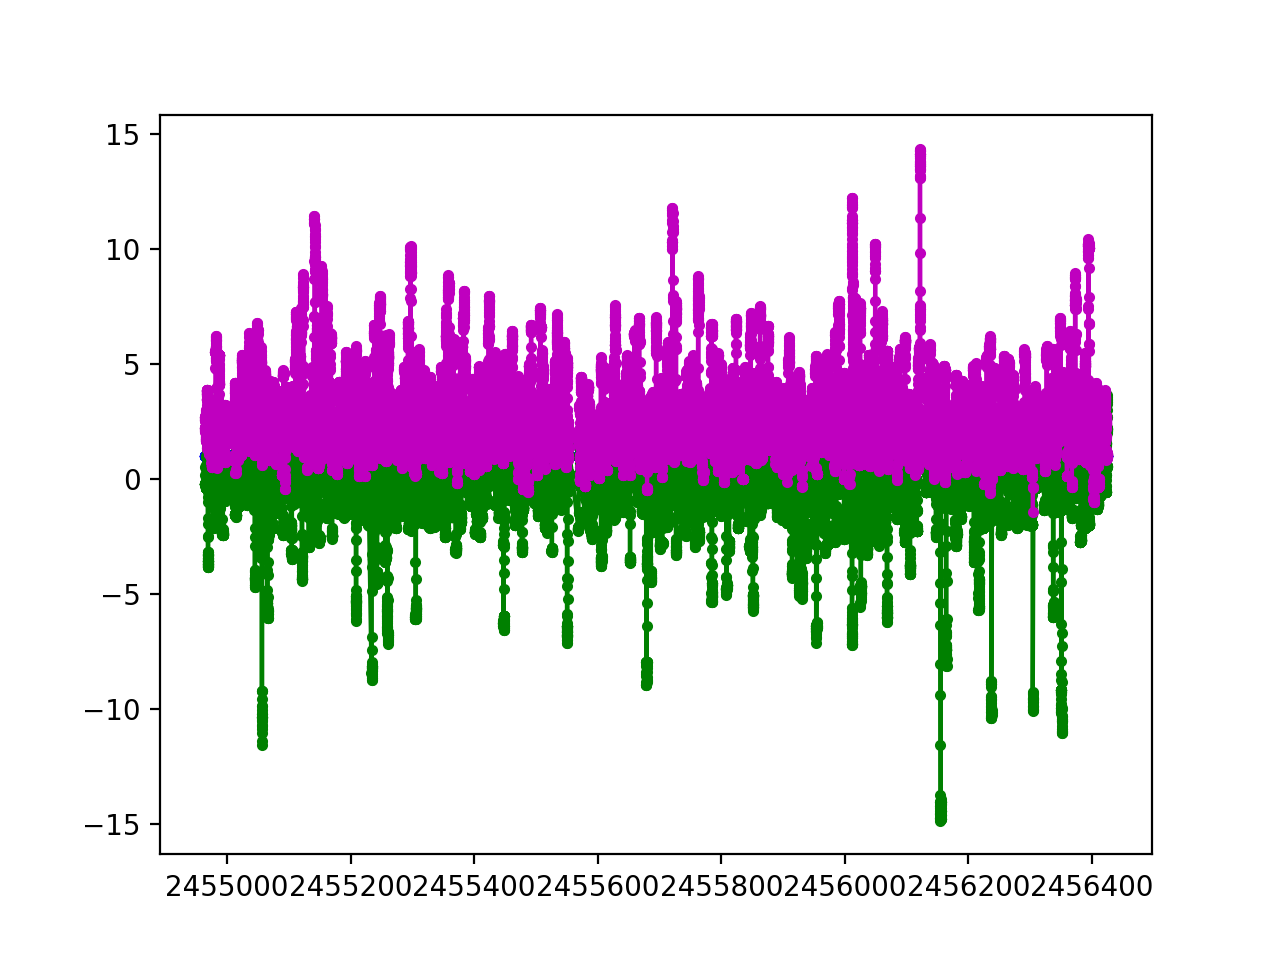

In [104]:
#for win in windows:
#    blurlcstat_nt_norm[win][blurlcstat_nt[win]>500] = 0.
#    blurlcstat_nt[win][blurlcstat_nt[win]>500] = 0.
#    lcstat_nt[win][lcstat_nt[win]>500] = 0.

p.figure()
p.plot(cbs.time,cbs.flux,'b.')
p.plot(cbs.time,cbs.blurlcstat_norm[0.3],'g.-')
p.plot(cbs.time,cbs.blurantistat_norm[0.3],'m.-')



In [56]:
#periodogram_nt = funcs.make_periodogram(tts_all,tds_all,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_pt = funcs.make_periodogram_pertransit(tts_all,tds_all,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_2 = funcs.make_periodogram(tts_all_2,tds_all_2,time_nt_cut,ppset_2_keys,fpset_2_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_pt_2 = funcs.make_periodogram_pertransit(tts_all_2,tds_all_2,time_nt_cut,ppset_2_keys,fpset_2_keys,windows,blurlcstat_nt_norm)

In [105]:
#print(cbs.ppset_keys)
#print(cbs.tts_all[0].keys())
cbs.make_periodogram(prisec=False,pertransit=False, statistic=cbs.blurlcstat_norm)
#periodogram_nt_both = funcs.make_periodogram_prisec(tts_all,tts_all_2,tds_all,tds_all_2,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)

In [34]:
cbs.tds_all[0]['92.540']['1.3752']

array([ 0.38054724,  0.25504767,  0.19070871,  0.30006182,  0.29425612,
        0.1909671 ,  0.25600875,  0.36153158,  0.19391001,  0.22933819,
        0.49277528,  0.19979045,  0.21231565,  0.72723083,  0.20922326,
        0.20135496])

<IPython.core.display.Javascript object>


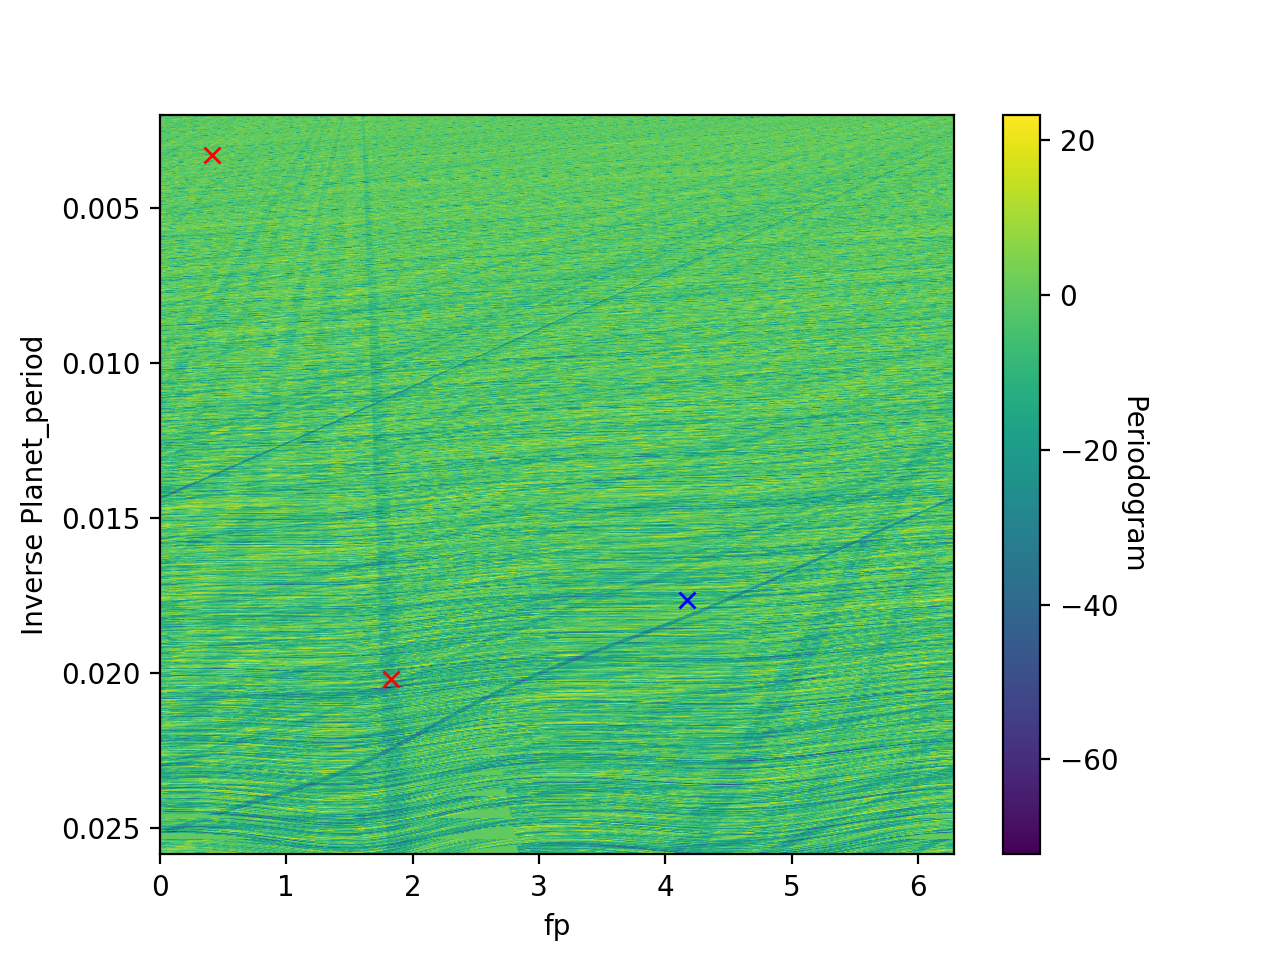

-72.27509876
-9.16700487422


In [114]:
cbs.plot_static(fppp0=[fp0,p_p0])
p.plot(cb_planetc.fp,1./p_planetc,'rx')
#p.figure()
#palette = p.cm.viridis
#p.imshow(periodogram_nt_both,origin='lower',
#         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
#         aspect='auto',cmap=palette)
#cbar = p.colorbar()
#cbar.set_label('Periodogram_prisec', rotation=270, labelpad=10)
#p.ylabel('Inverse Planet_period')
#p.xlabel('fp')
#p.plot(fp0,1./p_p0,'rx')
#minidx_both = np.unravel_index(np.argmin(periodogram_nt_both),(len(ppset),len(fpset)))
#p.plot(fpset[minidx_both[1]],1./ppset[minidx_both[0]],'bx')
#print(np.min(periodogram_nt_both))
#print((np.min(periodogram_nt_both)-np.mean(periodogram_nt_both))/np.std(periodogram_nt_both))


In [124]:

#these are using our reduced parameter nbody, but the first 20 transits match with the 2012 orosz paper to ~0.1d
planetb_tts = cbs.tts_all[0]['48.858']['1.8337']
planetb_tds = cbs.tds_all[0]['48.858']['1.8337']
#planetc_tts = cbs.tts_all[0]['302.78']['2.1123']
planetc_tds = cbs.tds_all[0]['302.78']['2.1123']
planetc_tts = np.array([ 2455246.54535901, 2455549.9955883, 2455850.4447023, 2456154.04238928]) + np.array([0.1,0.5,0.5,0.8])
#offsets the c transits to be correct (as extracting the blurs is awkward)

planetd_tts = np.array([2455977.363,2456163.85,2456350.375])
planetd_tds = np.array([0.1,0.3,0.3])

for tt,td in zip(planetb_tts,planetb_tds):
        start = np.searchsorted(cbs.time,tt-td/2.-0.1)
        end = np.searchsorted(cbs.time,tt+td/2.+0.2)
        cbs.time = np.hstack((cbs.time[:start],cbs.time[end:]))
        cbs.flux = np.hstack((cbs.flux[:start],cbs.flux[end:]))
        cbs.err = np.hstack((cbs.err[:start],cbs.err[end:]))
        #for win in cbs.windows:
        #    cbs.stattimes[win] =  np.hstack((cbs.stattimes[win][:start],cbs.stattimes[win][end:]))
        #    cbs.lcstat[win] =  np.hstack((cbs.lcstat[win][:start],cbs.lcstat[win][end:]))
        #    cbs.blurlcstat[win] =  np.hstack((cbs.blurlcstat[win][:start],cbs.blurlcstat[win][end:]))
        #    cbs.blurlcstat_norm[win] =  np.hstack((cbs.blurlcstat_norm[win][:start],cbs.blurlcstat_norm[win][end:]))

            
for tt,td in zip(planetc_tts,planetc_tds):
        start = np.searchsorted(cbs.time,tt-td/2.)
        end = np.searchsorted(cbs.time,tt+td/2.)
        cbs.time = np.hstack((cbs.time[:start],cbs.time[end:]))
        cbs.flux = np.hstack((cbs.flux[:start],cbs.flux[end:]))
        cbs.err = np.hstack((cbs.err[:start],cbs.err[end:]))
        #for win in cbs.windows:
        #    cbs.stattimes[win] =  np.hstack((cbs.stattimes[win][:start],cbs.stattimes[win][end:]))
        #    cbs.lcstat[win] =  np.hstack((cbs.lcstat[win][:start],cbs.lcstat[win][end:]))
        #    cbs.blurlcstat[win] =  np.hstack((cbs.blurlcstat[win][:start],cbs.blurlcstat[win][end:]))
        #    cbs.blurlcstat_norm[win] =  np.hstack((cbs.blurlcstat_norm[win][:start],cbs.blurlcstat_norm[win][end:]))

for tt,td in zip(planetd_tts,planetd_tds):
        start = np.searchsorted(cbs.time,tt-td/2.)
        end = np.searchsorted(cbs.time,tt+td/2.)
        cbs.time = np.hstack((cbs.time[:start],cbs.time[end:]))
        cbs.flux = np.hstack((cbs.flux[:start],cbs.flux[end:]))
        cbs.err = np.hstack((cbs.err[:start],cbs.err[end:]))


In [125]:
cbs.make_lcstat()

Statisticking
Normalising


In [126]:
cbs.make_periodogram(prisec=False,pertransit=False, statistic=cbs.blurlcstat_norm)

<IPython.core.display.Javascript object>


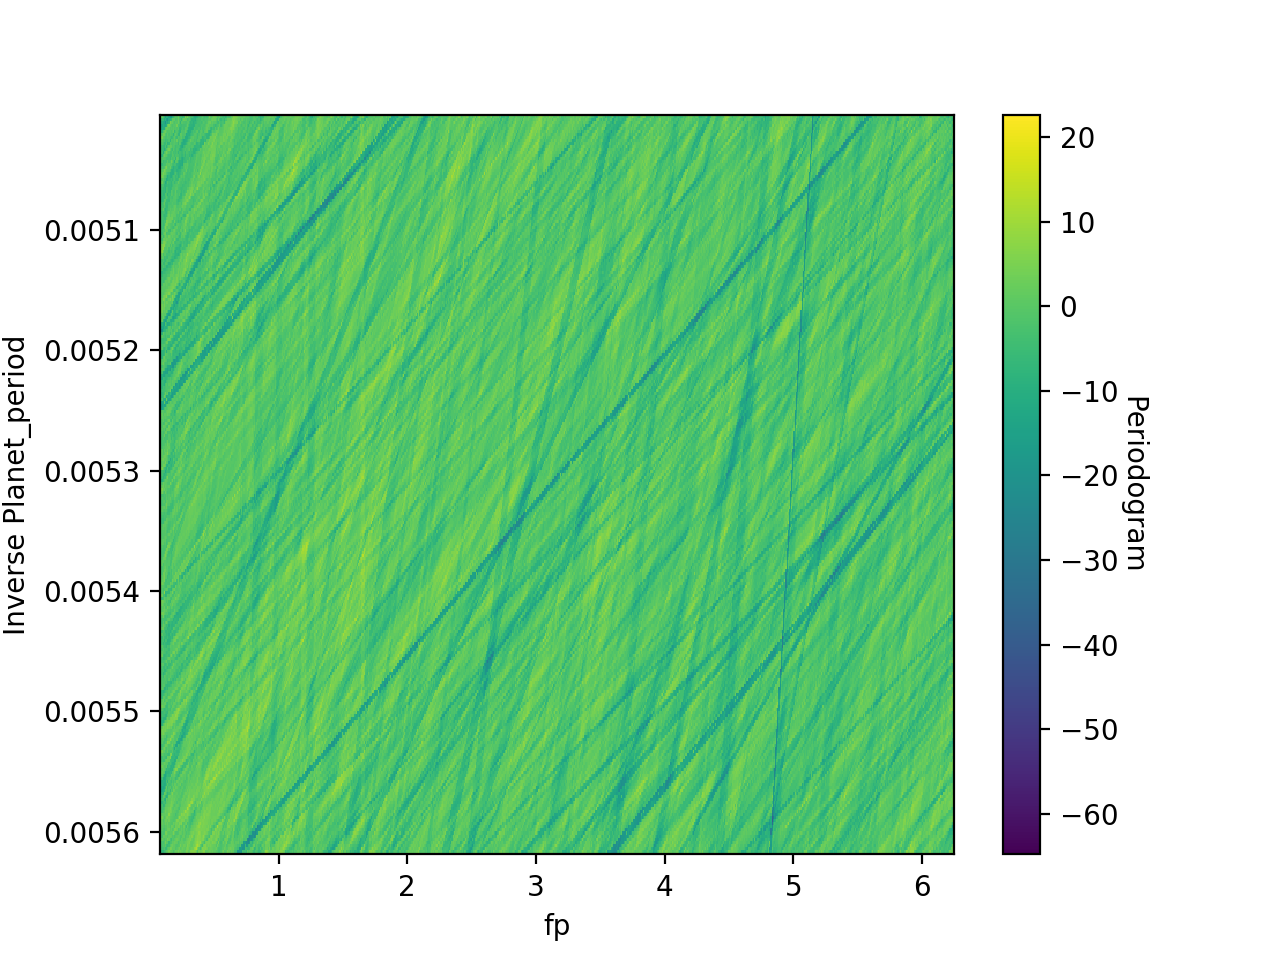

-64.8180660053
-8.01366356943


In [127]:
cbs.plot_static()

<IPython.core.display.Javascript object>


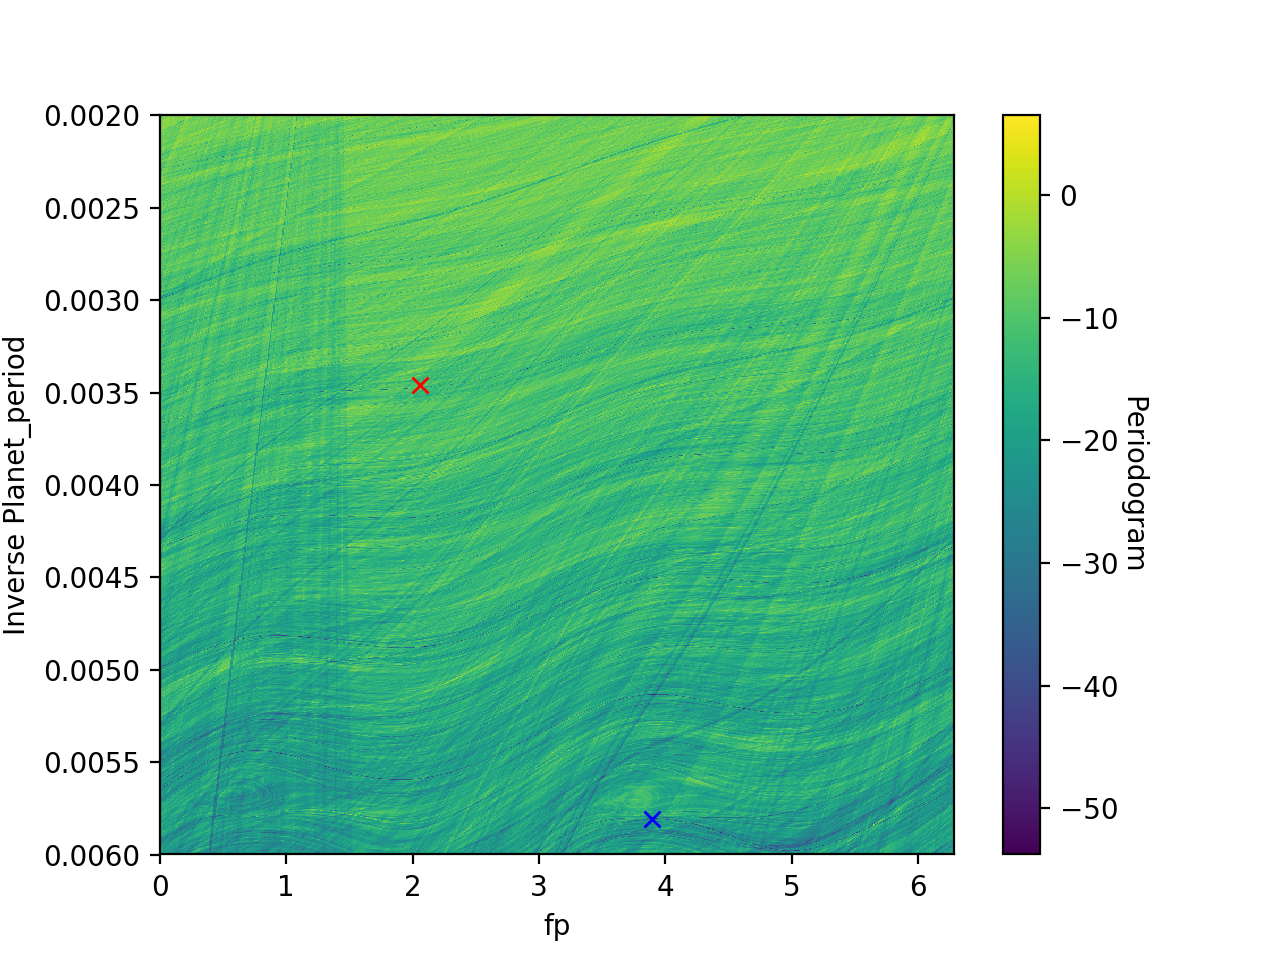

-53.7753061664
-7.42466489721


<IPython.core.display.Javascript object>


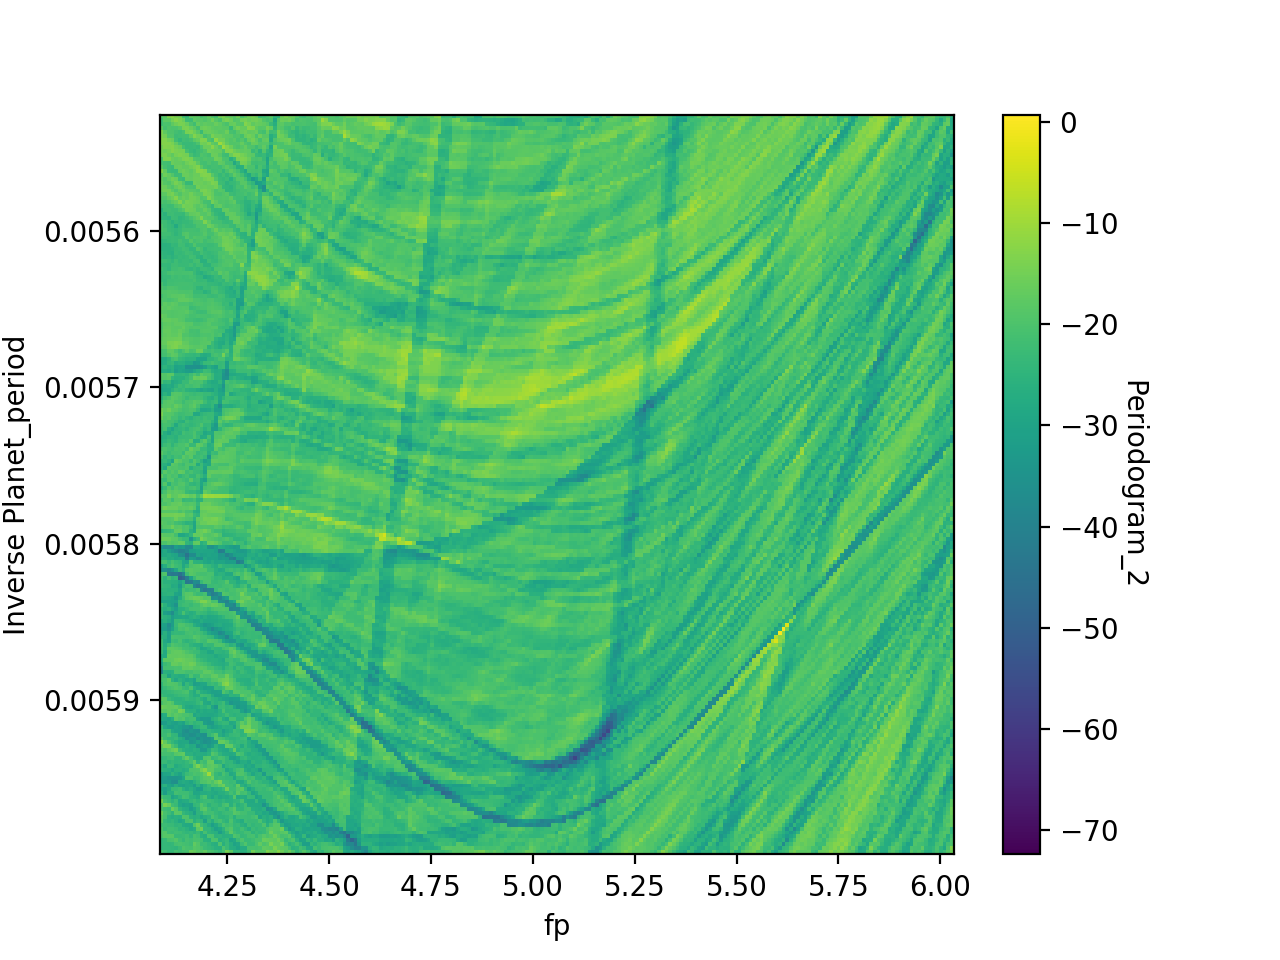

-72.4249241142
-9.14869807186


<IPython.core.display.Javascript object>


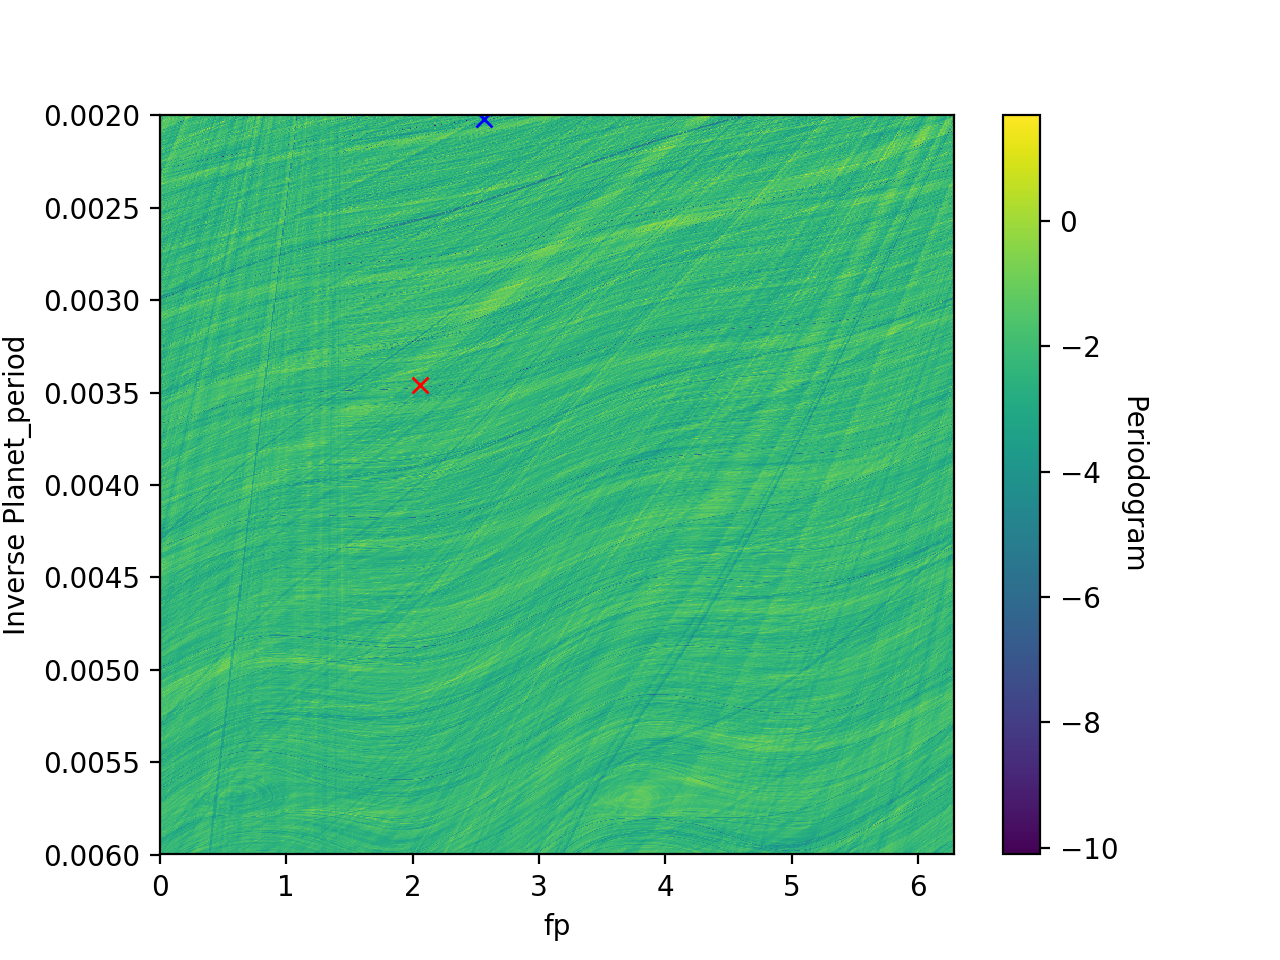

-10.1035654891
-13.2939990908


<IPython.core.display.Javascript object>


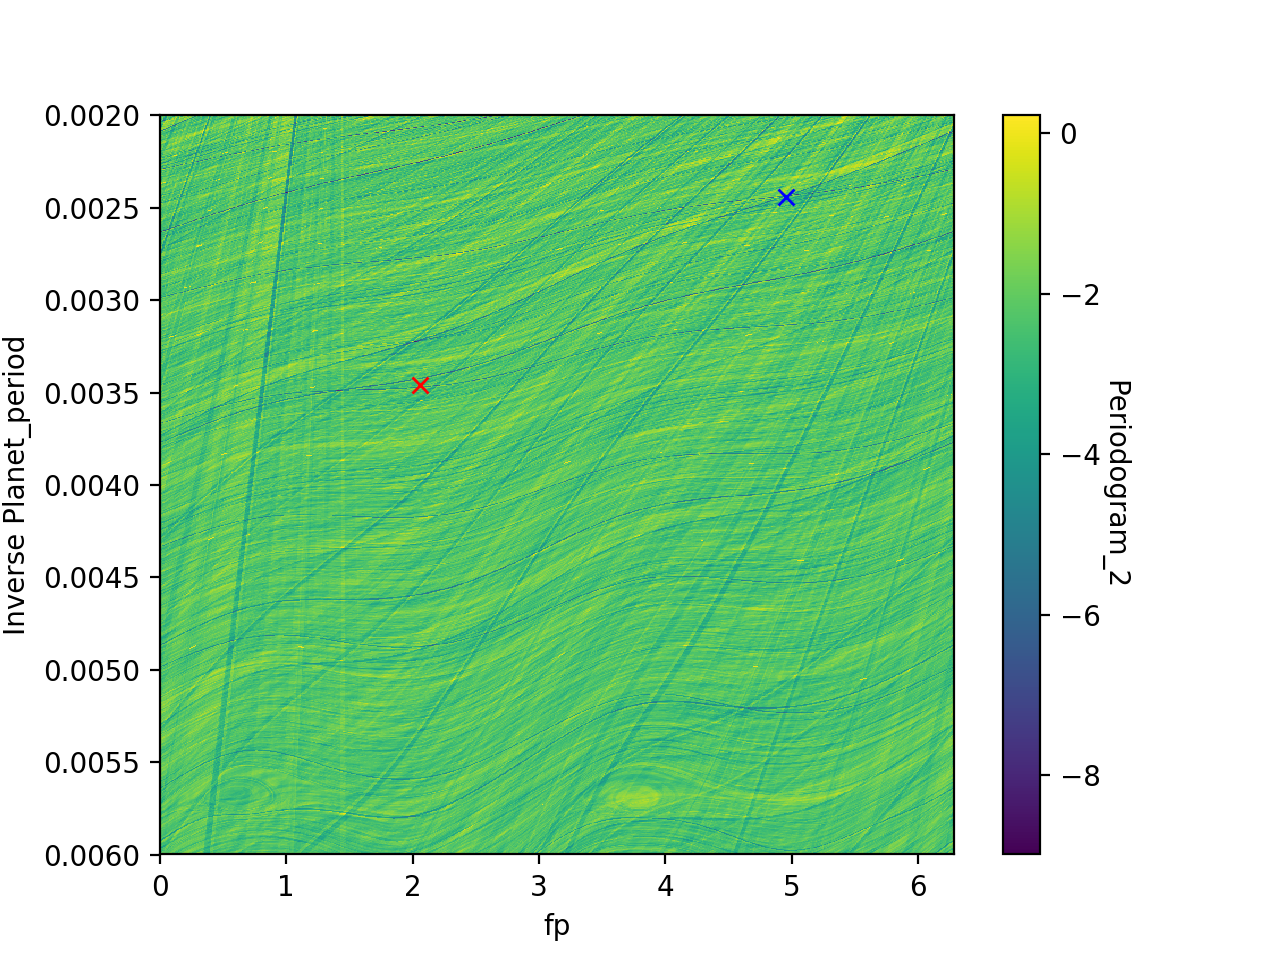

-8.98372775455
-11.0101485944


In [57]:

p.figure()
palette = p.cm.viridis
p.imshow(periodogram_nt,origin='lower',
         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')
minidx = np.unravel_index(np.argmin(periodogram_nt),(len(ppset),len(fpset)))
p.plot(fpset[minidx[1]],1./ppset[minidx[0]],'bx')
print(np.min(periodogram_nt))
print((np.min(periodogram_nt)-np.mean(periodogram_nt))/np.std(periodogram_nt))

p.figure()
palette = p.cm.viridis
p.imshow(periodogram_nt_2,origin='lower',
         extent=[np.min(fpset_2),np.max(fpset_2),1./np.min(ppset_2),1./np.max(ppset_2)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram_2', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')
minidx_2 = np.unravel_index(np.argmin(periodogram_nt_2),(len(ppset_2),len(fpset_2)))
p.plot(fpset_2[minidx_2[1]],1./ppset_2[minidx_2[0]],'bx')
print(np.min(periodogram_nt_2))
print((np.min(periodogram_nt_2)-np.mean(periodogram_nt_2))/np.std(periodogram_nt_2))


p.figure()
palette = p.cm.viridis
p.imshow(periodogram_nt_pt,origin='lower',
         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')
minidx_pt = np.unravel_index(np.argmin(periodogram_nt_pt),(len(ppset),len(fpset)))
p.plot(fpset[minidx_pt[1]],1./ppset[minidx_pt[0]],'bx')
print(np.min(periodogram_nt_pt))
print((np.min(periodogram_nt_pt)-np.mean(periodogram_nt_pt))/np.std(periodogram_nt_pt))

p.figure()
palette = p.cm.viridis
p.imshow(periodogram_nt_pt_2,origin='lower',
         extent=[np.min(fpset_2),np.max(fpset_2),1./np.min(ppset_2),1./np.max(ppset_2)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram_2', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')
minidx_pt_2 = np.unravel_index(np.argmin(periodogram_nt_pt_2),(len(ppset_2),len(fpset_2)))
p.plot(fpset_2[minidx_pt_2[1]],1./ppset_2[minidx_pt_2[0]],'bx')
print(np.min(periodogram_nt_pt_2))
print((np.min(periodogram_nt_pt_2)-np.mean(periodogram_nt_pt_2))/np.std(periodogram_nt_pt_2))


<IPython.core.display.Javascript object>


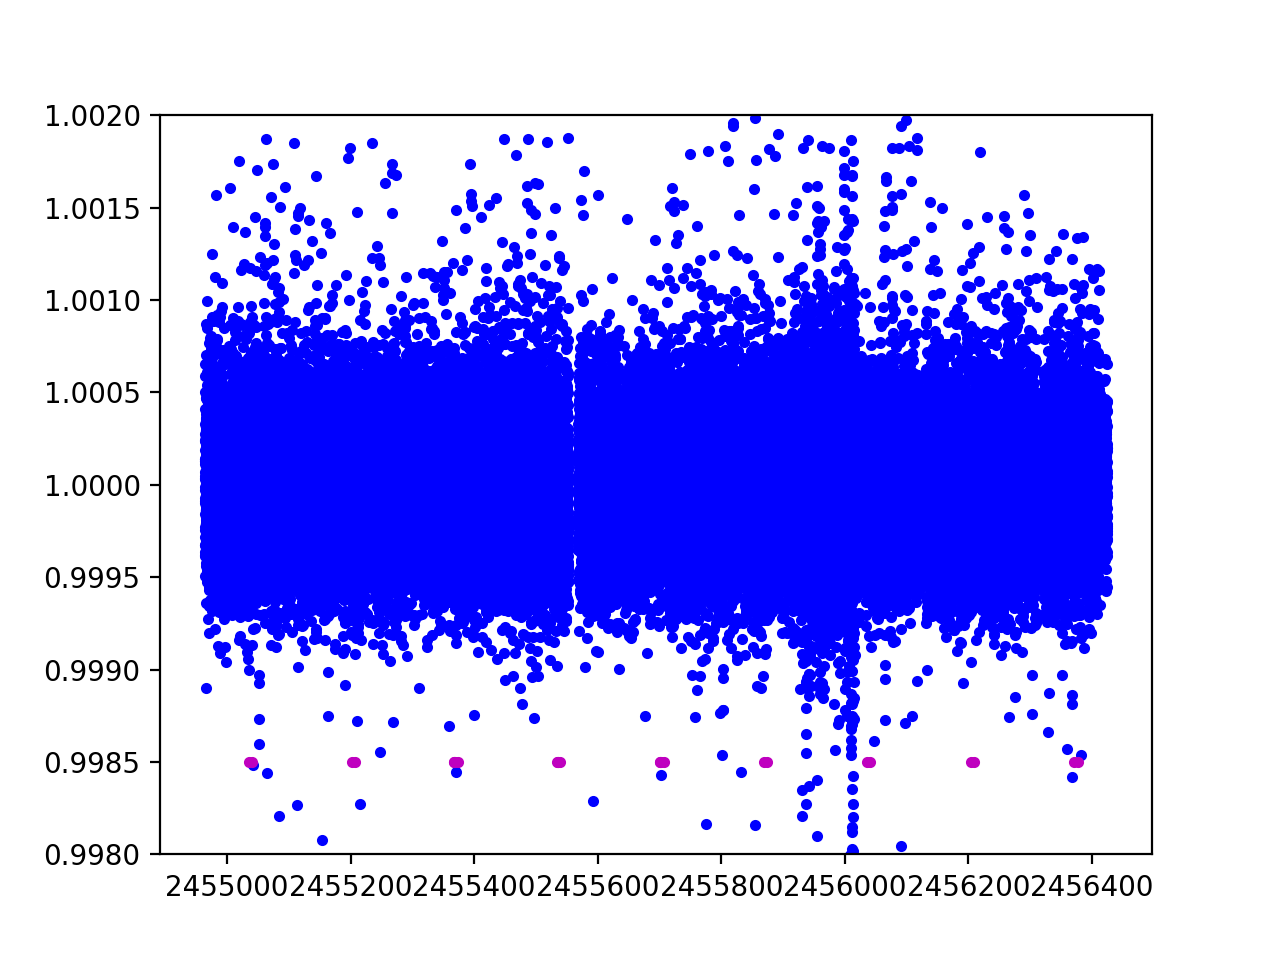

(0.998, 1.002)

In [54]:
p.figure()
p.plot(time_nt_cut,flux_nt_cut,'b.')
p.plot(time_nt_cut,lcstat_nt[0.3],'r.-')
p.plot(time_nt_cut,blurlcstat_nt[0.3],'g.-')

pp = ppset_keys[minidx_both[0]]
fp = fpset_keys[minidx_both[1]]
pp = ppset_keys[29]
fp = fpset_keys[572]


tts = tts_all[str(pp)[:6]][str(fp)[:6]]
tts = np.hstack((tts,tts_all_2[str(pp)[:6]][str(fp)[:6]]))
tds = tds_all[str(pp)[:6]][str(fp)[:6]]
tds = np.hstack((tds,tds_all_2[str(pp)[:6]][str(fp)[:6]]))

for transit,dur in zip(tts,tds):
    p.plot(transit,0.9985,'m.')
    #p.plot([transit-dur/2.,transit+dur/2.],[0.999,0.999])

p.ylim(0.998,1.002)

<IPython.core.display.Javascript object>


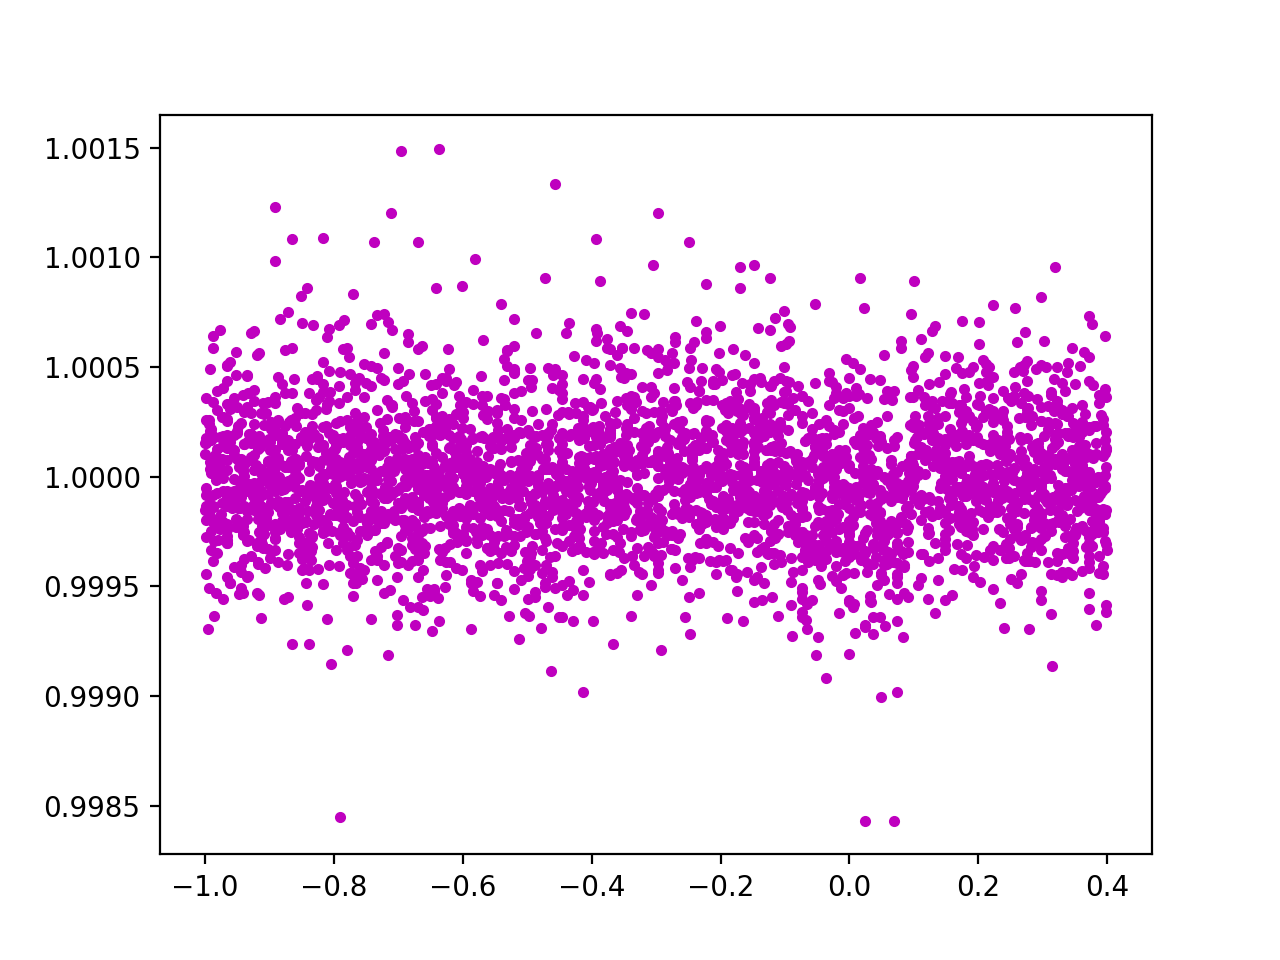

0.999883223636
451
0.00030888613636
8.02869206943


In [121]:
pp = ppset_keys[minidx_both[0]]
fp = fpset_keys[minidx_both[1]]
pp = ppset_keys[29]
fp = fpset_keys[572]

tts = tts_all[str(pp)[:6]][str(fp)[:6]]
tts = np.hstack((tts,tts_all_2[str(pp)[:6]][str(fp)[:6]]))
tds = tds_all[str(pp)[:6]][str(fp)[:6]]
tds = np.hstack((tds,tds_all_2[str(pp)[:6]][str(fp)[:6]]))
p.figure()
intransit = np.zeros(0)

for transit,dur in zip(tts,tds):
    #what's the window and blur window?
    blurfactor = 1. #1.5 means a 3 duration window is scanned
    minpoints = 3
    
    time_window, flux_window, timescale = funcs.extract_transit_window(transit,dur,time_nt_cut,
                                                                       flux_nt_cut,windows,
                                                                       minpoints,blurfactor) 
    start = np.searchsorted(timescale,-1/11.)
    end = np.searchsorted(timescale,1/11.)
    cut = np.searchsorted(timescale,0.4)
    intransit = np.hstack((intransit,flux_window[start:end]))

    if len(time_window)>0:
        p.plot(timescale[:cut],flux_window[:cut],'m.')
        #p.plot([-1/11.,-1/11.],[np.min(flux_window),np.max(flux_window)],'r--')
        #p.plot([1/11.,1/11.],[np.min(flux_window),np.max(flux_window)],'r--')

#print(intransit)
print(np.mean(intransit))
print(len(intransit))
print(np.std(intransit))
print((1-np.mean(intransit))/(np.std(intransit)/np.sqrt(len(intransit))))

<IPython.core.display.Javascript object>


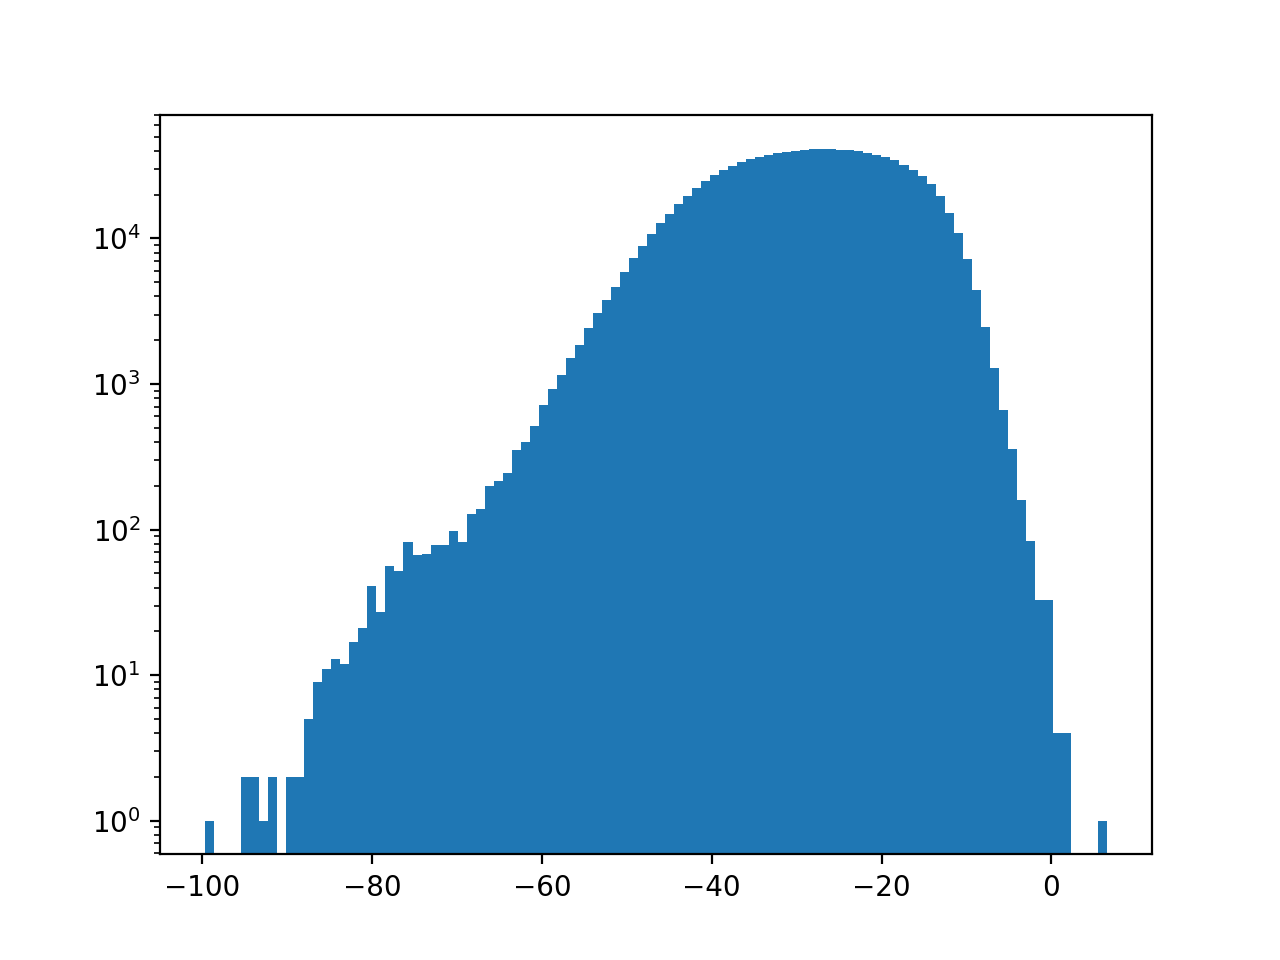

In [51]:
p.figure()
p.hist(periodogram_nt_both.flatten(),bins=100)
p.yscale('log', nonposy='clip')

In [122]:
cbs.plot_diag()

AttributeError: 'CBSearch' object has no attribute 'plot_diag'